# Numerical Lab: Quadrature and Function Approximation

## Student's names:

---


### Exercise 1: Gauss-Chebyshev Quadrature of the First Kind

The Gauss-Chebyshev quadrature rule is designed to approximate integrals of the form $\int_{-1}^{1} \frac{f(x)}{\sqrt{1-x^2}} \, dx$. The rule is given by
$$\int_{-1}^{1} \frac{f(x)}{\sqrt{1-x^2}} \, dx \approx \sum_{i=1}^n w_i^{(n)} f(x_i^{(n)}),$$
where $x_i^{(n)}$ are the roots of the $n$-th Chebyshev polynomial $T_n(x)$, and $w_i^{(n)}$ are the corresponding weights.


#### **(a) Roots and Weights Calculation**

Write a Python function, say `ChebyshevQuad(n)`, that performs the following for a given degree `n`:

1.  **Compute Roots:** Find the $n$ roots of $T_n(x)$ using `scipy.optimize.fsolve`. The Chebyshev polynomial $T_n(x)$ can be evaluated using `scipy.special.eval_chebyt(n, x)`.

```python
from scipy.special import eval_chebyt

...

# Eval Chebyshev polynomial
def chebyshev_poly(x):
    return eval_chebyt(n, x)
```

2.  **Compute Weights:** Once the roots $x_j$ are found, compute the quadrature weights $w_i^{(n)}$ using their definition involving Lagrange polynomials $L_i(x)$: $$w_i^{(n)} = \int_{-1}^{1} \frac{L_i(x)}{\sqrt{1-x^2}} \, dx, \quad \text{where} \quad L_i(x) = \prod_{\substack{j=1\\j\neq i}}^n \frac{x-x_j}{x_i-x_j}.$$
This integral can be computed numerically using `scipy.integrate.quad`.

```python
# Define Lagrange basis polynomial L_i(x)
def L_i(x):
    prod = 1.0
    for j in range(n):
      if j != i:
        prod *= (x - roots[j]) / (x_i - roots[j])
    return prod
```

Use your `ChebyshevQuad(n)` function to compute and display the roots and weights for $n = 2, 3, \dots, 11$. For verification, the theoretical roots and weights for Gauss-Chebyshev quadrature of the first kind are:
- $x_k = \cos\left(\frac{(2k-1)\pi}{2n}\right)$ for $k=1, \dots, n$,
- $w_k = \pi/n$ for all $k$.

Compare your computed weights to this theoretical value.



#### **(b) Application: Approximating $\pi$**

Use the Gauss-Chebyshev quadrature rule developed in part (a) to approximate the value of $\pi$. The integral identity is $$\pi = \int_{0}^{1} \frac{4}{1+x^2} dx.$$

To use the Gauss-Chebyshev rule, which applies to integrals on $[-1,1]$ with weight $1/\sqrt{1-x^2}$:

1.  Transform the integral from $[0,1]$ to $[-1,1]$. Let $x = \frac{1}{2}t + \frac{1}{2}$. Then $dx = \frac{1}{2}dt$. The integral becomes $\int_{-1}^1 \frac{2}{1 + ((t+1)/2)^2} dt$.

2.  Let $g(t) = \frac{2}{1 + ((t+1)/2)^2}$. The integral to approximate is $\int_{-1}^1 g(t) dt$.

3.  To use the Gauss-Chebyshev sum $$\sum w_i \phi(t_i) \approx \int_{-1}^1 \phi(t) \frac{dt}{\sqrt{1-t^2}},$$ we set $\phi(t) = g(t)\sqrt{1-t^2}$. The approximation is thus $\sum_{i=1}^n w_i g(t_i)\sqrt{1-t_i^2}$, where $t_i$ are the roots of $T_n(x)$ and $w_i$ are the corresponding weights computed in part (a).

Calculate the approximation for $n = 2, \dots, 40$. Plot the absolute error of your approximation compared to `np.pi` on a semi-logarithmic scale (log for error, linear for $n$).



#### **(c) Composite Gauss-Chebyshev Quadrature**

Develop a composite quadrature rule based on the $n$-point Gauss-Chebyshev quadrature. Use this composite rule to approximate $\pi = \int_{0}^{1} \frac{4}{1+x^2} dx$:

- Divide the interval $[A,B] = [0,1]$ into $N_{part}$ subintervals of equal width $h = (B-A)/N_{part}$. For each subinterval $[a_p, b_p]$ (where $a_p = A + (p-1)h, b_p = A+ph$), the integral $\int_{a_p}^{b_p} f(x)dx$ is approximated by transforming it to $[-1,1]$ and applying the $n$-point Gauss-Chebyshev rule:
$$\int_{a_p}^{b_p} f(x)dx \approx \frac{b_p-a_p}{2} \sum_{i=1}^n w_i f\left(\frac{b_p-a_p}{2}t_i + \frac{b_p+a_p}{2}\right) \sqrt{1-t_i^2}$$
where $t_i$ are the roots and $w_i$ are the weights from your $n$-point `ChebyshevQuad(n)` function.

- Use $n=3$ (degree of Chebyshev polynomial for base rule) and $N_{part}=4$ partitions. Calculate the total integral approximation and its error with respect to `np.pi`.

---

### Exercise 2: Function Approximation with Chebyshev Series

Consider approximating the Runge function $f(x) = \frac{1}{1+25x^2}$ on the interval $[-1,1]$ using a truncated Chebyshev series:
$$P_n(x) = \sum_{k=0}^{n} c_k T_k(x)$$



#### **(a) Computing Chebyshev Coefficients**

The coefficients $c_k$ are given by:
$$c_0 = \frac{1}{\pi} \int_{-1}^1 \frac{f(x)T_0(x)}{\sqrt{1-x^2}} dx, \quad c_k = \frac{2}{\pi} \int_{-1}^1 \frac{f(x)T_k(x)}{\sqrt{1-x^2}} dx \quad \text{for } k>0.$$
These integrals can be approximated using an $M$-point Gauss-Chebyshev quadrature rule (using roots $x_j^{(M)}$ and weights $w_j^{(M)}$ from your `ChebyshevQuad(M)` function):$$c_0 \approx \frac{1}{\pi} \sum_{j=1}^M w_j^{(M)} f(x_j^{(M)})$$

$$c_k \approx \frac{2}{\pi} \sum_{j=1}^M w_j^{(M)} f(x_j^{(M)}) T_k(x_j^{(M)})$$

Write a Python script to calculate these coefficients $c_k$ for $n=4, 8, 16,$ and $32$. For calculating the coefficients, use a sufficiently large number of quadrature points, e.g., $M=64$ (ensure $M > n_{max\_approx}$).



#### **(b) Accuracy Analysis**

For each $n \in \{4, 8, 16, 32\}$:
1.  Construct the approximation $P_n(x)$ using the computed coefficients. You can evaluate $P_n(x)$ using `np.polynomial.chebyshev.chebval`.
2.  Plot $f(x)$ and $P_n(x)$ on the same graph over $[-1,1]$.
3.  Plot the absolute error $|f(x) - P_n(x)|$ on a separate graph (possibly with a log scale for the error).
4.  Discuss how the maximum error behaves as $n$ increases.

---

C:\Users\22051\AppData\Local\Temp\ipykernel_8052\2551138918.py:58: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  roots = fsolve(lambda x: eval_chebyt(n, x), np.linspace(-1, 1, n+1))


[-0.99144486 -0.79335334 -0.60876143 -0.38268343 -0.60876143 -0.13052619
  0.13052619  0.60876143  0.38268343  0.60876143  0.79335334  0.99144486]
[  0.26880656   0.83847629  -1.21491278   3.59483284  -6.15818779
   9.35325063 -10.22293884   9.35325063  -6.15818779   3.59483284
  -1.21491278   0.83847629]


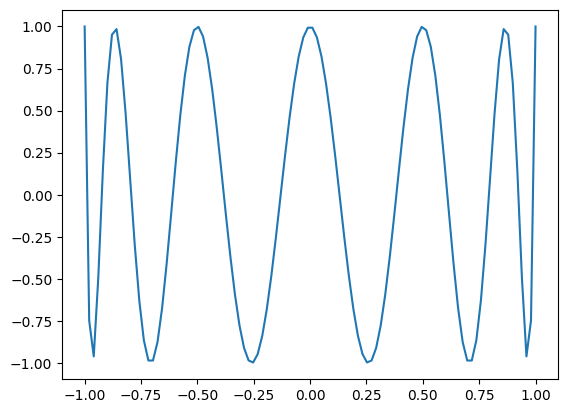

In [1]:
from scipy.special import eval_chebyt
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def ChebyshevQuad(n):
    n = int(n)
    # compute roots
    cheby_pol = polynomial(n)
    r = np.roots(cheby_pol)
    
    # compute weights
    w = weights(n, r)

    return r, w


dic = {}
dic[0] = [1]
dic[1] = [1, 0]

def polynomial(n):
    if n in dic.keys():
        return dic[n]
    pn0 = [0, 0] + polynomial(n - 2)
    pn1 = polynomial(n - 1) + [0]
    pn2 = []
    c1 = 2
    c0 = 1
    for i in range(n + 1):
        pn2.append(c1 * pn1[i] - c0 * pn0[i])
    dic[n] = pn2
    return pn2

def L_i(x, roots, i):
    prod = 1.0
    for j in range(len(roots)):
        if j != i:
            prod *= (x - roots[j]) / (roots[i] - roots[j])
    return prod

def weights(n, roots):
    w = np.zeros(n)
    for i in range(n):
        integrand = lambda x: L_i(x, roots, i) / (np.sqrt(1 - x**2))
        w[i] = quad(integrand, -1, 1, epsabs=1e-12)[0]
    
    return w


x = np.linspace(-1, 1, 100)

n = 12
c2 = eval_chebyt(2, x)
plt.plot(x, eval_chebyt(n, x), label='T_2(x)')

roots = fsolve(lambda x: eval_chebyt(n, x), np.linspace(-1, 1, n+1))
print(fsolve(lambda x: eval_chebyt(n, x), np.linspace(-1, 1, n)))
print(weights(n, roots))

In [2]:
ChebyshevQuad(12)

(array([-0.99144486, -0.92387953, -0.79335334,  0.99144486,  0.92387953,
         0.79335334, -0.60876143,  0.60876143, -0.38268343,  0.38268343,
        -0.13052619,  0.13052619]),
 array([0.26179939, 0.26179939, 0.26179939, 0.26179939, 0.26179939,
        0.26179939, 0.26179939, 0.26179939, 0.26179939, 0.26179939,
        0.26179939, 0.26179939]))

Approximate $\pi$

In [3]:

acc = [10,20,30,40]

g = lambda t: 2 / (1 + ((t+1)/2)**2)
phi = lambda t: g(t) * np.sqrt(1-t**2)
for n in acc:
  xi = np.roots(polynomial(n))
  wi = weights(n, xi)
  pi = 0
  for i in range(n):
    pi = pi + wi[i]*phi(xi[i])
  print(pi)


3.1539469166073277
3.144678007163516
3.142963691182602
3.142273791144208


Part c

In [4]:
n = 3
N = 4
h = 1.0 / N

g = lambda t: 2 / (1 + ((t+1)/2)**2)
phi = lambda t: g(t) * np.sqrt(1-t**2)

roots, ws = ChebyshevQuad(n)
approxs = []
for i in range(N):
    a_i = i * h
    b_i = (i + 1) * h

    g = lambda t: 2 / (1 + (((b_i-a_i)*t+(b_i+a_i))/2)**2 )
    phi = lambda t: g(t) * np.sqrt(1-t**2)
    # f = lambda t: 4 * np.sqrt(1-t**2) / 1+t**2
    sigma = 0.0
    for i in range(n):
        t_i = roots[i]
        # x_i = (b_i - a_i)/2 * t_i + (a_i + b_i) / 2
        sigma = sigma + ws[i] * phi(t_i)

    approxs.append((b_i - a_i) * sigma / 2)

print(approxs)
print(sum(approxs)*2)

[np.float64(0.5127800118172439), np.float64(0.45784478352016555), np.float64(0.3767018261433761), np.float64(0.29726655302409183)]
3.289186349009755


Function Approximation

In [5]:
def chebyshev_poly(n, x):
    return eval_chebyt(n, x)

def coefficients(n, M):
    roots, ws = ChebyshevQuad(M)
    c = np.zeros(n+1)

    sigma = 0.0
    for j in range(M):
        sigma += ws[j] * f(roots[j])

    c[0] = sigma / np.pi

    for k in range(1, n+1):
        sigma = 0.0
        for j in range(M):
            sigma += ws[j] * f(roots[j]) * chebyshev_poly(k, roots[j])

        c[k] = 2 * sigma / np.pi

    return c

M = 40
n_array = [4, 8, 16, 32]
c_array = []
f = lambda x: 1 / (1 + 25*x**2)

for n in n_array:
    c = coefficients(n, M)
    c_array.append(c)


[ 1.96116279e-01  2.00329213e-09 -2.63611162e-01 -6.33041340e-09
  1.77167553e-01  1.16704018e-08 -1.19070752e-01 -1.88776662e-08
  8.00252717e-02  2.91053651e-08 -5.37838347e-02 -4.39899059e-08
  3.61478112e-02  6.59128479e-08 -2.42954375e-02 -9.83818427e-08
  1.63303338e-02  1.46591924e-07 -1.09780835e-02 -2.18256729e-07
  7.38232663e-03  3.24842595e-07 -4.96774198e-03 -4.83403281e-07
  3.34799604e-03  7.19308504e-07 -2.26392947e-03 -1.07030308e-06
  1.54209162e-03  1.59254616e-06 -1.06698842e-03 -2.36959660e-06
  7.62603367e-04]


Text(0.5, 1.0, 'Chebyshev Series Approximation')

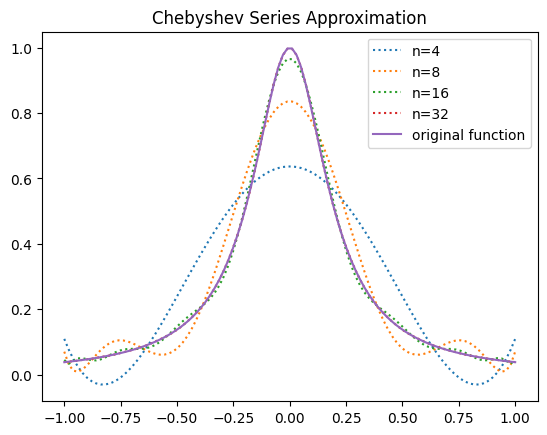

In [6]:
x = np.linspace(-1, 1, 100)
n = n_array[3]
c = c_array[3]
print(c)

def p_n(n, c, x):
    vals = np.zeros_like(x)
    for i in range(len(c)):
        # t_k = lambda x: c[i] * chebyshev_poly(x)
        vals += c[i] * chebyshev_poly(i, x)
    return vals

f = lambda x: 1 / (1 + 25*x**2)

for i in range(len(c_array)):
    n = n_array[i]
    c = c_array[i]
    plt.plot(x, p_n(n, c, x), ':', label=f'n={n}')

plt.plot(x, f(x), label=f'original function')
plt.legend()
plt.title("Chebyshev Series Approximation")

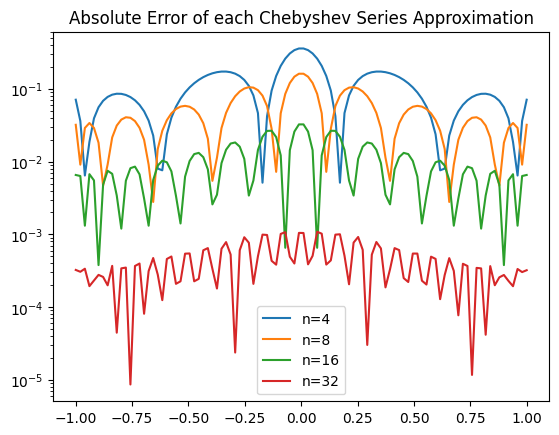

In [7]:
for i in range(len(c_array)):
    n = n_array[i]
    c = c_array[i]
    plt.semilogy(x, np.abs(f(x) - p_n(n, c, x)), '-', label=f'n={n}')

plt.legend()
plt.title("Absolute Error of each Chebyshev Series Approximation")
plt.show()

We can see that the maximum absolute error follows an exponential

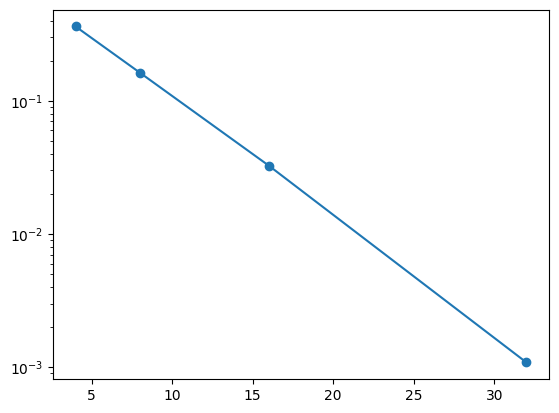

In [8]:
max_abs_error = []
for i in range(len(c_array)):
    n = n_array[i]
    c = c_array[i]
    max_abs_error.append(max(np.abs(f(x) - p_n(n, c, x))))

plt.semilogy(n_array, max_abs_error, 'o-', label='max abs error')